In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
df= pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [52]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [53]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [54]:
df['Category'].nunique()

25

In [55]:
categories = df['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


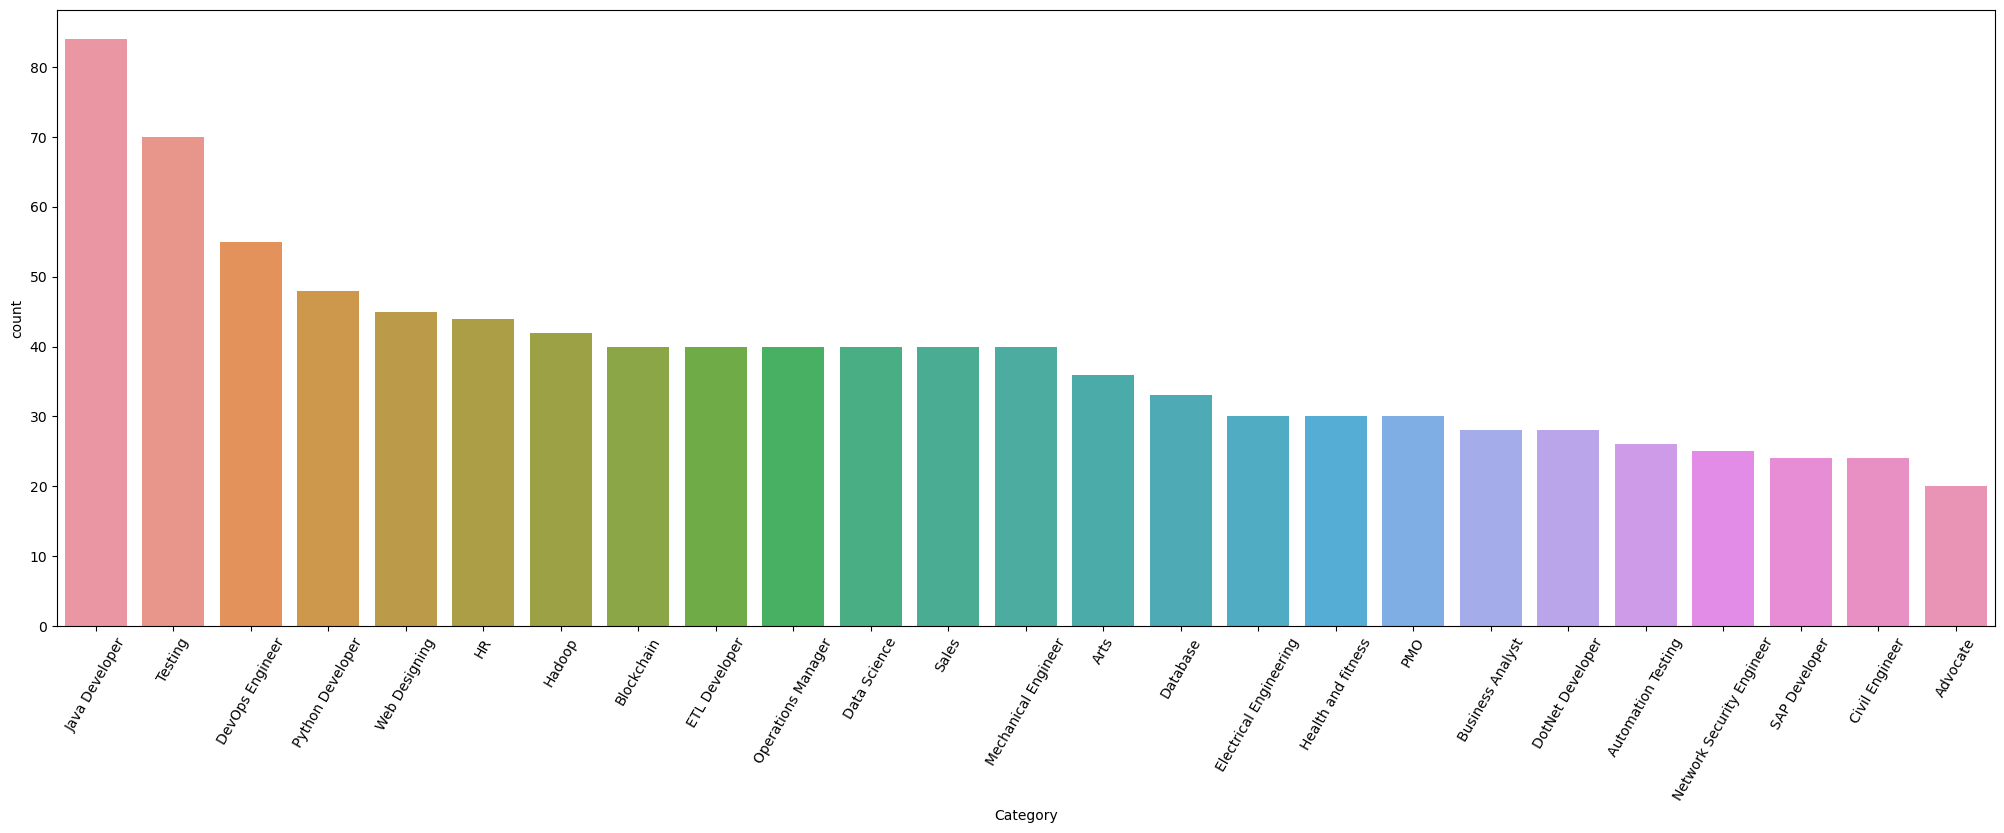

In [56]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
 
# Show the plot
plt.show()

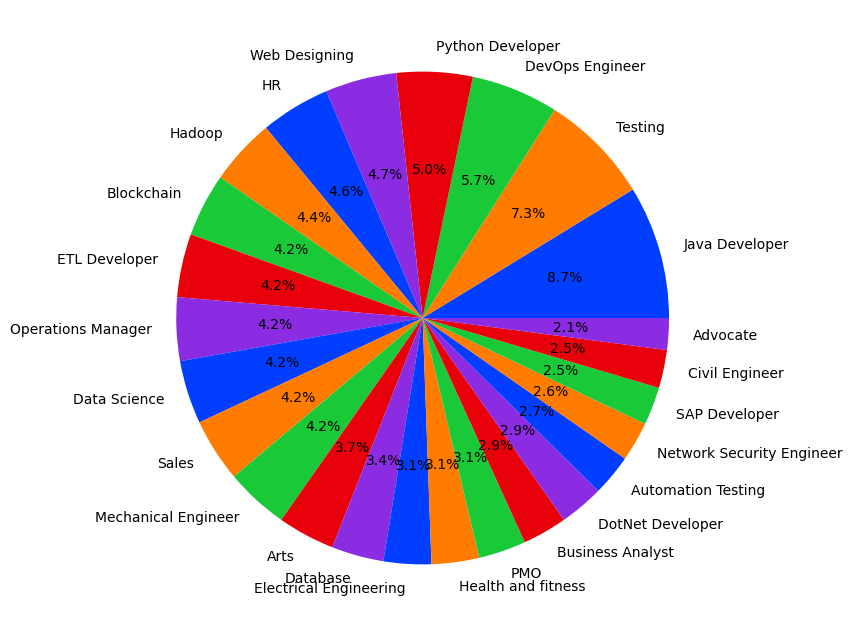

In [57]:
plt.figure(figsize=(25,8))

#define Seaborn color palette to use
colors= sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(categories['Category'], labels= categories['index'], colors = colors, autopct='%.1f%%')
plt.show()

In [58]:
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [59]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remP
    resumeText = re.sub('#\S+', '', resumeText)  # removP
    resumeText = re.sub('@\S+', '  ', resumeText)  # remP
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [60]:
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [61]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [62]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [63]:

SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [64]:
totalWords= []

In [65]:
Sentences= df2['Resume'].values

In [66]:
cleanedSentences= ""

In [67]:
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [68]:
wordfreqdist = nltk.FreqDist(totalWords)

In [69]:
wordfreqdist

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [70]:
mostcommon = wordfreqdist.most_common(30)

In [71]:
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

(-0.5, 399.5, 199.5, -0.5)

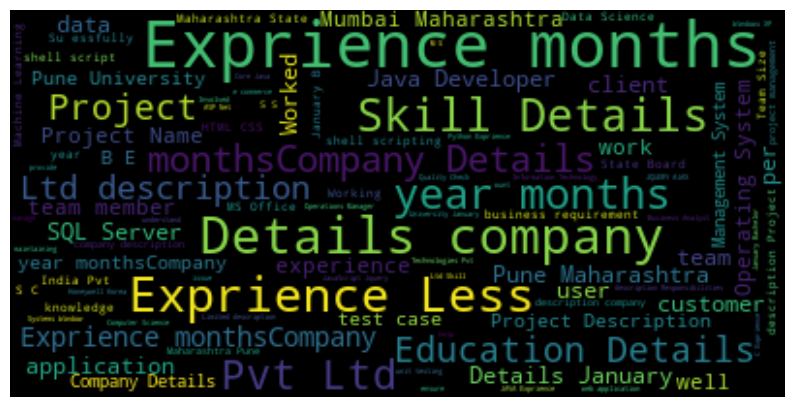

In [72]:
WordCloud= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [74]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [75]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [76]:
WordFeatures.shape

(962, 7351)

In [77]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


We have trained and tested the data and now let’s build the models:

In [79]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [80]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(),    
}

In [81]:
model_list=[]
for model in models.values():
    model_list.append(OneVsRestClassifier(model))
model_list

[OneVsRestClassifier(estimator=KNeighborsClassifier()),
 OneVsRestClassifier(estimator=LogisticRegression()),
 OneVsRestClassifier(estimator=SVC())]

In [82]:
for i in model_list:
    i.fit(X_train, y_train)
    print(f'{i} trained')

print("*"*60)
print("all models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
************************************************************
all models trained


In [83]:
for count, value in enumerate(model_list):
    print(f"Accuracy of {value} on training set :", model_list[count].score(X_train, y_train))
    print(f"Accuracy of {value} on test set :", model_list[count].score(X_test, y_test))
    print("*"*100)

print("all scores calculated")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set : 0.9805825242718447
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set : 0.966804979253112
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=LogisticRegression()) on test set : 0.991701244813278
****************************************************************************************************
Accuracy of OneVsRestClassifier(estimator=SVC()) on training set : 1.0
Accuracy of OneVsRestClassifier(estimator=SVC()) on test set : 0.991701244813278
****************************************************************************************************
all scores calculated


In [84]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report


In [89]:
for count, value in enumerate(model_list):
    print(f'{value} classification report')
    print("-"*80)
    print(classification_report(y_test, model_list[count].predict(X_test)))
    print("*"*100)
    print(" ")

OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       0.88      0.78      0.82         9
           7       1.00      0.89      0.94         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      0.7

In [86]:
from sklearn.model_selection import cross_val_score, KFold

In [87]:
results = {}

kf = KFold(n_splits= 10)

for count, value in enumerate(model_list):
    result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
    results[value] = result

In [88]:

print("*********************************")
for name, result in results.items():
    print(f'{name} : {round(np.mean(result),3)}')
    print("----------------")

*********************************
OneVsRestClassifier(estimator=KNeighborsClassifier()) : 0.958
----------------
OneVsRestClassifier(estimator=LogisticRegression()) : 0.99
----------------
OneVsRestClassifier(estimator=SVC()) : 0.997
----------------
